In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [111]:
df = pd.read_excel('wide_range.xlsx')
layer = 11
X = df.iloc[:, df.columns != f'layer {layer}']
y = df.iloc[:,layer-1]

X.columns = X.columns.astype(str)
X = X.apply(lambda x: x*(10**12))

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)

In [113]:
y_train

805     344.660386
1798    318.387290
193     305.241303
162     359.882238
1211    301.072836
           ...    
599     303.811769
1599    307.688462
1361    369.965830
1547    324.166657
863     340.244495
Name: layer 11, Length: 1540, dtype: float64

In [114]:
forest = RandomForestRegressor(n_estimators=500, random_state=101)

forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=101)

In [115]:
importances = forest.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) 7.55e-06                       0.110624
 2) 7.85e-06                       0.103424
 3) 7.65e-06                       0.100765
 4) 7.6e-06                        0.100544
 5) 7.8e-06                        0.086554
 6) 7.7e-06                        0.084467
 7) 7.5e-06                        0.080133
 8) 7.75e-06                       0.076019
 9) 7.95e-06                       0.075918
10) 8e-06                          0.075550
11) 7.9e-06                        0.069630
12) 7.45e-06                       0.030714
13) 7.4e-06                        0.004508
14) 7.35e-06                       0.000807
15) 7.3e-06                        0.000262
16) 7.25e-06                       0.000061
17) 7.2e-06                        0.000005
18) 7.15e-06                       0.000004
19) layer 2                        0.000000
20) layer 6                        0.000000
21) layer 7                        0.000000
22) layer 4                        0.000000
23) layer 3                     

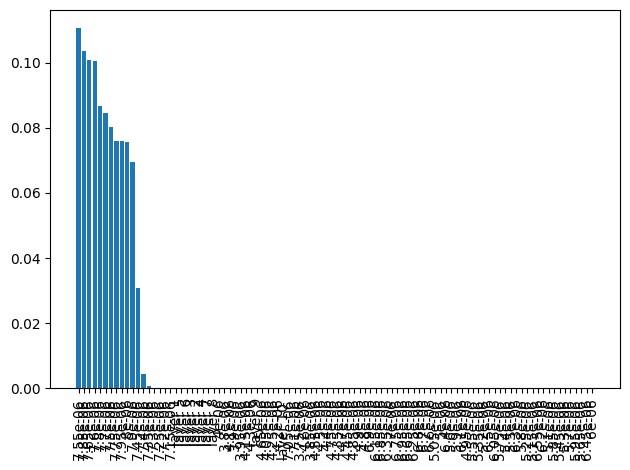

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [117]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [118]:
linear_model = LinearRegression()

rfe = RFE(estimator=linear_model, n_features_to_select=10)

In [119]:
X_selected = rfe.fit_transform(X, y)
selected_feature_indices = rfe.get_support(indices=True)

In [120]:
print(selected_feature_indices)

[ 1  2  5  7  9 28 61 62 89 90]


In [121]:
for i in selected_feature_indices:
    print(X.columns[i])

layer 2
layer 3
layer 6
layer 8
layer 10 
4.65e-06
6.3e-06
6.35e-06
7.7e-06
7.75e-06


In [122]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: -0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: -0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: -0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, 

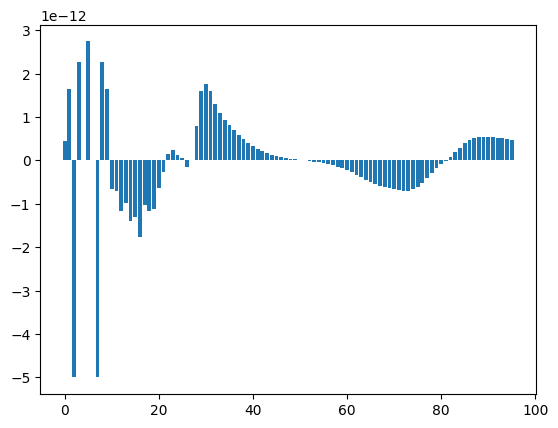

In [123]:
importance = model.coef_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [124]:
sorted_indices = np.argsort(importance)[::-1]

feat_labels = X.columns

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) layer 6                        0.000000
 2) layer 4                        0.000000
 3) layer 9                        0.000000
 4) 4.75e-06                       0.000000
 5) layer 10                       0.000000
 6) layer 2                        0.000000
 7) 4.7e-06                        0.000000
 8) 4.8e-06                        0.000000
 9) 4.85e-06                       0.000000
10) 4.9e-06                        0.000000
11) 4.95e-06                       0.000000
12) 5e-06                          0.000000
13) 4.65e-06                       0.000000
14) 5.05e-06                       0.000000
15) 5.1e-06                        0.000000
16) 7.7e-06                        0.084467
17) 7.75e-06                       0.076019
18) 7.65e-06                       0.100765
19) 7.8e-06                        0.086554
20) 7.85e-06                       0.103424
21) 7.6e-06                        0.100544
22) 7.9e-06                        0.069630
23) 5.15e-06                    